# DS-Project1 : Writing a Data Science Blog Post

## Seattel AirBNB Dataset Analysis

This dataset includes the following fils:  1.Listings.csv: contains full description of listings and average review score  2. calendar.csv : contains listing id, availability and price for that day

## Business Understanding:

Airbnb is a platform of accommodation, here I'll analyze the seattle dataset and try to answer below questions

1.Waht is the busiest season in Seattle?<br> 2. Which Month room cost is high? <br> 3.hat is the popular neighbourhoods?<br> 4. what is the most expensive and cheapest neighbourhoods?

## Data Understanding

In [1]:
# import necessary package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data into dataframe

seattle_listing = pd.read_csv('listings.csv')
seattle_calendar = pd.read_csv('calendar.csv')


### Exploring the data

### A.Listing dataset 

1.check number of rows and colums.<br>2.check missing values.<br>3.check columns datatype, convert price from object to float.<br>4.Clean data.<br>5.identify categorical and quantitative variables.<br>

In [3]:
#check sample data
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
#display the info of listing dataset
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [5]:
#check the shape of listing dataset
seattle_listing.shape

(3818, 92)

license                   1.000000
square_feet               0.974594
monthly_price             0.602672
security_deposit          0.511262
weekly_price              0.473808
notes                     0.420639
neighborhood_overview     0.270299
cleaning_fee              0.269775
transit                   0.244631
host_about                0.224987
host_acceptance_rate      0.202462
review_scores_accuracy    0.172342
review_scores_checkin     0.172342
review_scores_value       0.171818
review_scores_location    0.171556
dtype: float64

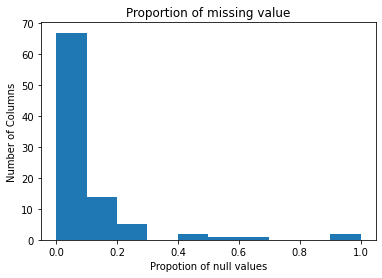

In [6]:
#the proportion of missing values in listing dataset
missing_proportion=(seattle_listing.isnull().sum()/seattle_listing.shape[0]).sort_values(ascending= False)
plt.xlabel('Propotion of null values') #set x label
plt.ylabel('Number of Columns') #set /y label
plt.title('Proportion of missing value') #set Title
plt.hist(missing_proportion) 
missing_proportion.head(15)

Above graph shows the proportion of missing values in each column sorted in ascending order. The columns with high proportion of null values (30% or more)will be removed, such as license (100%),Square_feet(97%). monthly_price and weekly_price both can be removed since we've another column of price which might be used in our analysis.<br> Regarding other columns we will see if they're required in our analysis or can be removed. 

In [7]:
#Copy the listings dataset in order to start cleaning ,Remove columns with high number of null values
listing_clean=seattle_listing.drop(labels=['license','square_feet','monthly_price','weekly_price','security_deposit']
                                   ,axis=1)


In [8]:
#check price type
listing_clean.price.dtype

dtype('O')

In [9]:
#price variable is object and contain $ sign & , i'll remove the $ sign & , and convert it to float
listing_clean['price']=listing_clean['price'].str.replace('$','')
listing_clean['price']=listing_clean['price'].str.replace(',','')
listing_clean['price']=listing_clean['price'].astype(float)

In [10]:
#make sure that price is converted to float
listing_clean.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [11]:
# check columns type fisrt 50 columns
listing_clean.dtypes[:50]

id                                int64
listing_url                      object
scrape_id                         int64
last_scraped                     object
name                             object
summary                          object
space                            object
description                      object
experiences_offered              object
neighborhood_overview            object
notes                            object
transit                          object
thumbnail_url                    object
medium_url                       object
picture_url                      object
xl_picture_url                   object
host_id                           int64
host_url                         object
host_name                        object
host_since                       object
host_location                    object
host_about                       object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object


In [12]:
# check columns type last 50 columns
listing_clean.dtypes[50:]

accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
amenities                            object
price                               float64
cleaning_fee                         object
guests_included                       int64
extra_people                         object
minimum_nights                        int64
maximum_nights                        int64
calendar_updated                     object
has_availability                     object
availability_30                       int64
availability_60                       int64
availability_90                       int64
availability_365                      int64
calendar_last_scraped                object
number_of_reviews                     int64
first_review                         object
last_review                          object
review_scores_rating            

In [13]:
#Identify categorical columns
listing_clean.select_dtypes(include='object').columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'j

In [14]:
#identify Quantitive columns
listing_clean.select_dtypes(include=('float64','int64')).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [15]:
#let's drop the columns which will not be used in our analysis
col_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 
            'neighborhood_overview', 'transit', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
           'host_name', 'host_about', 'host_thumbnail_url','host_picture_url', 'street', 'city', 'state', 'zipcode', 
           'market', 'smart_location', 'country_code', 
            'country', 'latitude', 'longitude','calendar_updated', 'calendar_last_scraped', 'first_review',
           'last_review', 'amenities', 'host_verifications']
#Let's delete column which has one single unique value as it's value will not make sense
for col in listing_clean.columns:
    if listing_clean[col].nunique() == 1:
        col_drop.append(col)
#col_drop   
listing_clean.drop(col_drop, axis=1, inplace=True)
listing_clean.columns

Index(['id', 'notes', 'thumbnail_url', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_gu

In [16]:
listing_clean.shape

(3818, 49)

### Calendar dataset

1.check number of rows and colums.<br>2.check columns datatype, convert price from object to float and convert date to date type.<br>3.check missing values.<br>4.Clean data.<br>6.change available value from t,f to 1,0 and convert to int type

In [17]:
#check number of rows & columns
seattle_calendar.shape

(1393570, 4)

In [18]:
#check columns datatype
seattle_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [19]:
#price variable is object and contain $ sign & , i'll remove the $ sign & , and convert it to float
seattle_calendar['price']=seattle_calendar['price'].str.replace('$','')
seattle_calendar['price']=seattle_calendar['price'].str.replace(',','')
seattle_calendar['price']=seattle_calendar['price'].astype(float)

In [20]:
#make sure price is converted to float
seattle_calendar.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [21]:
#the propotion of missing values in calendar dataset
missing_propotion_cal=seattle_calendar.isnull().sum()/seattle_calendar.shape[0]
print(missing_propotion_cal) 

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64


In [22]:
t=seattle_calendar.groupby('available')['price'].sum()
t

available
f            0.0
t    128915264.0
Name: price, dtype: float64

It seems if the listing is not available , price will be 0

In [23]:
#check the data range by using min and max
print('the date range from ',seattle_calendar.date.min(),'to',seattle_calendar.date.max())

the date range from  2016-01-04 to 2017-01-02


In [24]:
#convert date type to date instead of object to extract the month
seattle_calendar['date']=pd.to_datetime(seattle_calendar['date'])
#make sure date is converted
seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [25]:
#Check the listing availability by calculating the vailability propotion of a year
listing_available_prop=(seattle_calendar.groupby('available')['listing_id'].count()/seattle_calendar.shape[0])
print('the listing availability propotion in a year ',listing_available_prop)

the listing availability propotion in a year  available
f    0.32939
t    0.67061
Name: listing_id, dtype: float64


In [26]:
#copy the dataframe to clean the data
calendar_clean=seattle_calendar
#change available value f,t to 0,1
calendar_clean.available[calendar_clean.available =='t']=1
calendar_clean.available[calendar_clean.available =='f']=0

<ipython-input-26-4b5e5cf3853d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_clean.available[calendar_clean.available =='t']=1
<ipython-input-26-4b5e5cf3853d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_clean.available[calendar_clean.available =='f']=0


In [27]:
calendar_clean['available']=calendar_clean['available'].astype('int64')

### Question1: What is the busiest season in Seattle?

In [28]:
#let's calculate occupancy rate

ocp_rate = calendar_clean[['date', 'available']].groupby('date').mean()
ocp_rate['occupancy'] = 1 - ocp_rate['available']

In [29]:
ocp_rate

,available,occupancy
date,,
2016-01-04,0.454426,0.545574
2016-01-05,0.488999,0.511001
2016-01-06,0.478261,0.521739
2016-01-07,0.465165,0.534835
2016-01-08,0.466737,0.533263
...,...,...
2016-12-29,0.742535,0.257465
2016-12-30,0.743845,0.256155
2016-12-31,0.748821,0.251179


Text(0.5, 1.0, 'Occupancy Rate by Month')

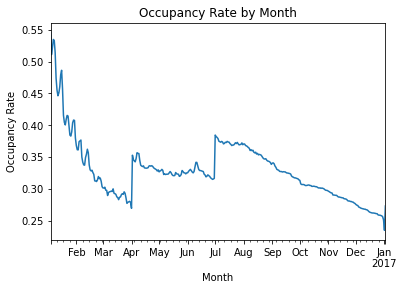

In [30]:
#plot the time series graph
ax=ocp_rate['occupancy'].plot()
ax.set_ylabel('Occupancy Rate') #set y label
ax.set_xlabel('Month') #set x label
ax.set_title('Occupancy Rate by Month')

#### Answer question1:

From above graph, It shows that the highest occupancy rate is in January 2016 then it's going down and in Jul, August rate is going up (Summer season), I'm surprised,I thought in summer the rate should be high but it might be because people would not prefer to put thier home in AirBnb at January due to winter season

### Question2: Which month room cost is high?

In [31]:


#let's calculate price rate

price_rate = calendar_clean[['date', 'price']].groupby('date').mean()
price_rate

,price
date,
2016-01-04,122.085879
2016-01-05,120.681307
2016-01-06,120.928258
2016-01-07,120.958896
2016-01-08,127.640853
...,...
2016-12-29,138.045503
2016-12-30,144.738380
2016-12-31,145.698146


Text(0.5, 1.0, 'price Rate by Month')

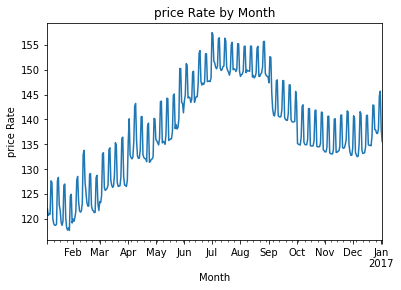

In [32]:
#plot the time series graph
ax=price_rate['price'].plot()
ax.set_ylabel('price Rate') #set y label
ax.set_xlabel('Month') #set x label
ax.set_title('price Rate by Month')

### Answer Question2:

From above graph,we can see that price rate is high in summer season (July,August,September) where the lowest rate is in January, february as expected low visit during winter season.

### Question 3: What is the popular neighbourhoods?

To answer this question, I'll check the top 15 neighbourhood,

Text(0.5, 1.0, 'Top 15 Neighbourhood')

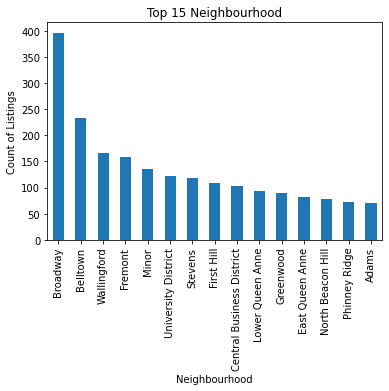

In [33]:
# Top 15 neighbourhood
top_15=listing_clean['neighbourhood_cleansed'].value_counts()
# Top 15 neighbourhood
top_15[:15].plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Count of Listings')
plt.title('Top 15 Neighbourhood')

### Answer Question 3

The popular Neighbourhood are Broadway,Beltown and Wallingford

### Question 4: What is the expensive and cheapest neighbourhood in Seattle?

1. Expensive Neighbourhood

Text(0.5, 1.0, 'Top 5 expensive Neighbourhood')

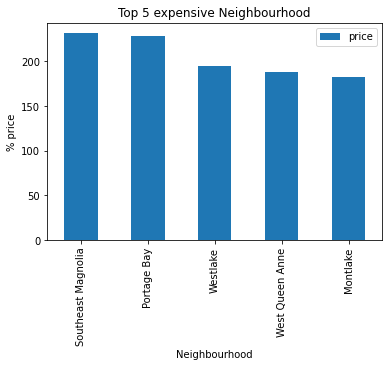

In [34]:
#Top 5 Neighbourhood
top_5=listing_clean.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values('price',ascending=False)
# Top 15 neighbourhood
top_5[:5].plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('% price')
plt.title('Top 5 expensive Neighbourhood')


In [35]:
top_5[:5]

,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474


2.Cheapest Neighbourhood

Text(0.5, 1.0, 'Top 5 Cheapest Neighbourhood')

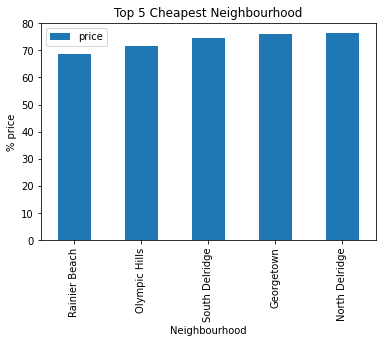

In [36]:
buttom_5=listing_clean.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values('price',ascending=True)
# Top 15 neighbourhood
buttom_5[:5].plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('% price')
plt.title('Top 5 Cheapest Neighbourhood')

In [37]:
buttom_5[:5]

,price
neighbourhood_cleansed,
Rainier Beach,68.555556
Olympic Hills,71.687500
South Delridge,74.666667
Georgetown,76.125000
North Delridge,76.375000


### Answer Question 4:

Most expensive neighbourhood is Southeast Magnolia with average price 231.70 then Portage Bay with 227.85 while cheapest one is  Rainier Beach with average price is 68.55 then Olympic Hills with 71.68